In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime

In [2]:
import sys
import os 
sys.path.insert(0, os.path.abspath('../packages'))
import steps, functions, optimizers

In [3]:
step = steps.GoldenSectionStep(da = 0.01, tol = 1e-8, check_direction=True)#, normalize=True)

In [4]:
def f(x1, x2):

    return x1**2 - 3*x1*x2 + 4*x2**2 + x1 - x2

def gradf(x1, x2):

    return np.array(
        [2*x1 - 3*x2 + 1, -3*x1 + 8*x2 - 1]
    )

def hessf(x1, x2):

    return np.array(
        [
        [ 2, -3],
        [-3,  8]
        ]
    )

#f = functions.NumericalSpecialFunction(f)
f = functions.AnalyticalSpecialFunction(f, gradf, hessf)

p_inicial = np.array([1, 2])

In [5]:
optimizrs = [
    ('Univariant', optimizers.UnivariantOptimizer(tol=1e-5)),
    ('Powell', optimizers.PowellOptimizer(tol=1e-5)),
    ('SteepestDesc', optimizers.SteepestDescentOptimizer(tol=1e-5)),
    ('FletchReeves', optimizers.FletcherReevesOptimizer(tol=1e-5)),
    ('NewtonRaph', optimizers.NewtonRaphsonOptimizer(tol=1e-5)),
]

Univariant: p_final = [-0.714278\\ -0.142854\\ -0.285714].T. Execução:0:00:00.010306, 40 iterações
Powell: p_final = [-0.714286\\ -0.142857\\ -0.285714].T. Execução:0:00:00.007800, 6 iterações
SteepestDesc: p_final = [-0.714274\\ -0.142852\\ -0.285714].T. Execução:0:00:00.007381, 15 iterações
FletchReeves: p_final = [-0.714280\\ -0.142855\\ -0.285714].T. Execução:0:00:00.004883, 10 iterações
NewtonRaph: p_final = [-0.714286\\ -0.142857\\ -0.285714].T. Execução:0:00:00.000994, 1 iterações


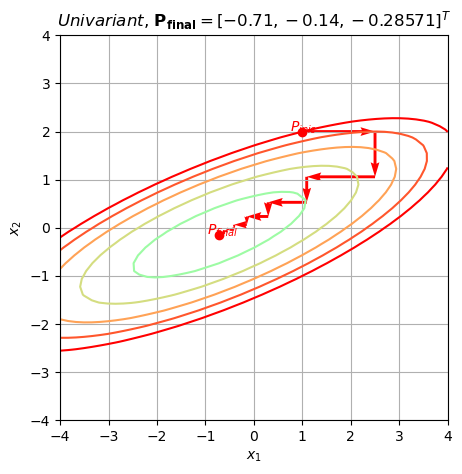

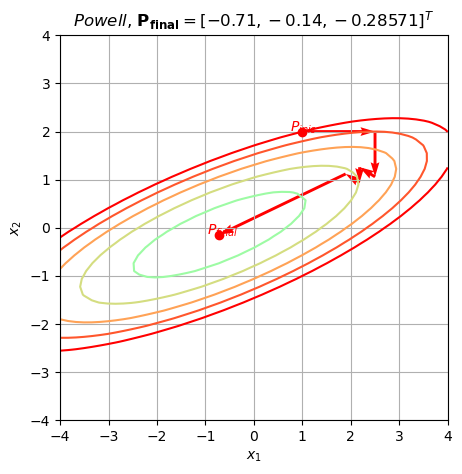

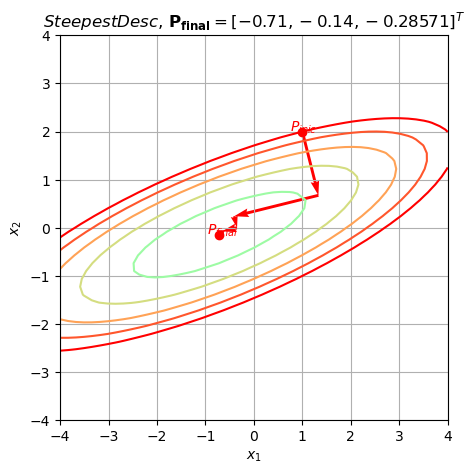

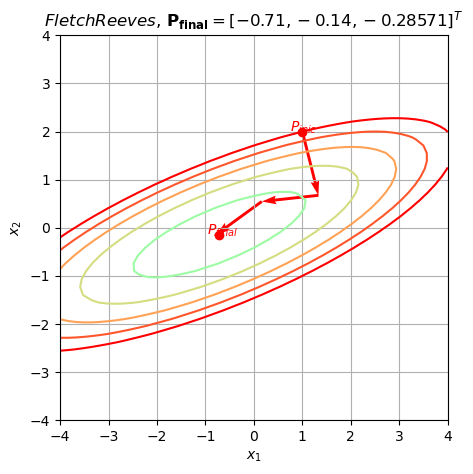

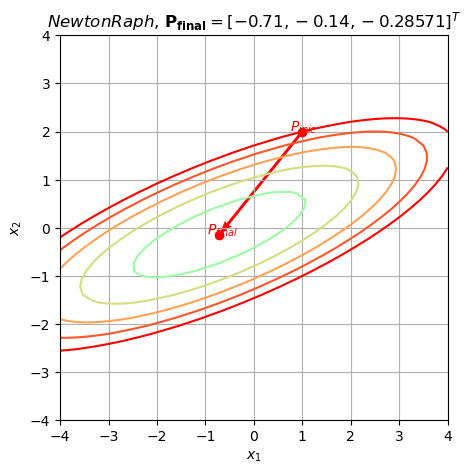

In [6]:
item = 'a'

x = np.linspace(-4, 4, 50)
y = np.linspace(-4, 4, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)


for name, optimizer in optimizrs:
    t_init = datetime.datetime.now()
    p_final = optimizer(f, p_inicial, step)
    t_final = datetime.datetime.now()
    print(f'{name}: p_final = [{p_final[0]:.6f}\\\\ {p_final[1]:.6f}\\\\ {f(*p_final):.6f}].T. Execução:{t_final - t_init}, {optimizer.iter} iterações')
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    ax.contour(X, Y, Z, np.linspace(-10, 10, 10),cmap='rainbow')
    ax.plot(*p_inicial, 'ro')
    ax.text(p_inicial[0]-0.25, p_inicial[1], '$P_{inic}$', color='red')
    ax.plot(*p_final, 'ro')
    ax.text(p_final[0]-0.25, p_final[1], '$P_{final}$', color='red')
    cache = optimizer.get_history()
    for i in range(len(cache)-1):
        p_i = cache[i]
        p_f = cache[i+1]
        ax.quiver(p_i[0], p_i[1], p_f[0]-p_i[0], p_f[1]-p_i[1], color='red', angles='xy', scale_units='xy', scale=1)#, label='Passo completo')
    ax.grid()
    #ax.legend()
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title(f'${name}$, $\mathbf{{P_{{final}}}} = [{p_final[0]:.2f}, {p_final[1]:.2f}, {f(*p_final):.5f}]^T$')
    fig.savefig(f'images/q1{item}_{name}.pdf')

In [7]:
[np.linalg.norm(grd) for grd in optimizrs[-1][-1].cache_grad]

[12.36931687685298, 5.378661474221396e-08]

In [8]:
optimizrs[-2][-1].cache_x

[array([1, 2]),
 array([1.33116883, 0.6753247 ]),
 array([0.16136503, 0.54677469]),
 array([-0.78914707, -0.14792156]),
 array([-0.77753477, -0.17049761]),
 array([-0.71373562, -0.14469586]),
 array([-0.71387613, -0.14265874]),
 array([-0.71394169, -0.14276022]),
 array([-0.71428103, -0.14284966]),
 array([-0.71428103, -0.14284966]),
 array([-0.71427987, -0.14285527])]